In [1]:
# Installing necessary libraries with pip
!pip install plotly --user 
!pip install cufflinks --user

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 51kB 275kB/s 
  Running setup.py bdist_wheel for cufflinks ... done
  Stored in directory: /Users/umitcakmak/Library/Caches/pip/wheels/fe/65/2a/c27161ec188f5129f8ed0266e69c14964589d48d43766f1af3
  Running setup.py bdist_wheel for colorlover ... done
  Stored in directory: /Users/umitcakmak/Library/Caches/pip/wheels/fc/c3/f7/fde32e0d906ad64fe8011a823ea39e0197616116150f4a8376
Successfully built cufflinks colorlover
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
# Necessary imports
import os
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff

init_notebook_mode(connected=True)
sys.path.append("".join([os.environ["HOME"]])) 

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### First 2 dimensions

In [34]:
x = [v[0] for v in iris_data.data]
y = [v[1] for v in iris_data.data]

# Create a trace
trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers'
)

layout= go.Layout(
    title= 'Iris Dataset',
    hovermode= 'closest',
    xaxis= dict(
        title= 'sepal length (cm)',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'sepal width (cm)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

data = [trace]

fig= go.Figure(data=data, layout=layout)
plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

#### Scatter plot matrix

In [22]:
import pandas as pd
df = pd.DataFrame(iris_data.data,
                         columns=['sepal length (cm)',
                                  'sepal width (cm)',
                                  'petal length (cm)',
                                  'petal width (cm)'])

df['class'] = [iris_data.target_names[i] for i in iris_data.target]

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
fig = ff.create_scatterplotmatrix(df, index='class', diag='histogram', size=10, height=800, width=800)
plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

#### 3D Chart

In [57]:
# Creating data for the plotly
trace1 = go.Scatter3d(
    # Extracting data based on label
    x=[x[0][0] for x in zip(iris_data.data, iris_data.target) if x[1] == 0],
    y=[x[0][2] for x in zip(iris_data.data, iris_data.target) if x[1] == 0],
    z=[x[0][3] for x in zip(iris_data.data, iris_data.target) if x[1] == 0],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    # Extracting data based on label
    x=[x[0][0] for x in zip(iris_data.data, iris_data.target) if x[1] == 1],
    y=[x[0][2] for x in zip(iris_data.data, iris_data.target) if x[1] == 1],
    z=[x[0][3] for x in zip(iris_data.data, iris_data.target) if x[1] == 1],
    mode='markers',
    marker=dict(
        color='rgb(#3742fa)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

trace3 = go.Scatter3d(
    # Extracting data based on label
    x=[x[0][0] for x in zip(iris_data.data, iris_data.target) if x[1] == 2],
    y=[x[0][2] for x in zip(iris_data.data, iris_data.target) if x[1] == 2],
    z=[x[0][3] for x in zip(iris_data.data, iris_data.target) if x[1] == 2],
    mode='markers',
    marker=dict(
        color='rgb(#ff4757)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(104, 74, 114)',
            width=1
        ),
        opacity=0.9
    )
)


data = [trace1, trace2, trace3]

# Layout settings
layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'sepal length (cm)'),
        yaxis = dict(
            title= 'petal length (cm)'),
        zaxis = dict(
            title= 'petal width (cm)'),),
)


fig = go.Figure(data=data, layout=layout)
plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

#### Hyperparameters

In [93]:
from sklearn.cluster import KMeans

In [78]:
KMeans?

Init signature: KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
Docstring:     
K-Means clustering

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default: 10
    Number of time the k-means algorithm will be run with different
    c

In [91]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=500, centers=3, n_features=3, cluster_std=[2.1, 1.5, 3.7], random_state=442)

In [94]:
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(X)
print(y_pred)

[1 2 1 1 0 0 1 0 1 0 1 2 0 0 2 0 2 1 1 1 1 0 0 1 0 2 0 2 2 1 2 2 2 0 1 2 2
 0 0 1 0 1 1 1 1 1 1 2 1 1 2 2 0 2 0 0 1 1 2 0 0 0 0 1 0 1 2 0 0 2 2 2 0 0
 0 0 0 2 0 0 1 0 1 0 1 1 2 1 0 1 1 2 1 0 2 2 1 2 2 1 0 0 2 0 2 0 0 2 2 1 0
 2 0 1 2 1 0 0 0 0 0 1 0 2 1 1 0 2 0 2 1 0 1 1 0 1 1 0 2 1 1 0 2 1 1 1 1 1
 1 0 2 2 0 1 0 2 1 0 0 2 0 1 0 0 0 0 2 0 1 2 2 1 1 0 0 1 0 1 0 0 2 1 0 2 0
 0 0 2 1 1 0 1 0 2 2 0 2 2 0 2 1 2 1 1 1 0 2 0 1 1 0 1 1 2 1 0 2 2 0 0 1 2
 0 2 0 2 0 1 2 1 0 0 2 0 1 2 0 2 1 1 1 0 1 1 0 2 2 0 2 2 1 0 1 0 1 0 1 1 0
 1 0 1 0 0 0 2 1 1 1 1 0 0 0 2 2 2 2 2 2 2 1 2 0 0 1 1 1 1 2 1 2 2 2 0 2 2
 1 0 1 1 0 0 1 1 0 0 1 2 0 1 2 1 2 2 1 2 2 0 0 0 0 0 1 1 0 2 2 1 1 2 2 1 2
 0 2 1 2 0 1 0 0 1 2 1 1 2 2 2 1 0 1 1 0 1 0 1 1 2 1 0 1 1 2 1 1 0 1 2 1 1
 1 1 2 1 0 0 2 0 1 2 1 1 2 1 2 2 1 2 0 0 0 1 1 2 0 0 0 1 1 0 1 0 0 0 0 1 2
 1 0 1 1 1 0 2 0 2 2 0 2 0 2 0 0 0 0 0 2 0 1 1 0 0 1 0 0 2 1 0 0 1 2 0 1 0
 1 1 0 2 1 1 1 2 1 1 0 1 1 0 0 0 0 0 0 2 1 1 0 0 0 1 2 0 0 0 1 0 2 0 2 0 2
 0 1 2 1 2 2 1 0 0 1 1 1 

In [95]:
k_means = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
y_pred = k_means.fit_predict(X)
print(y_pred)

[2 0 2 2 1 1 2 1 2 1 2 0 1 1 0 1 0 2 2 2 2 1 1 2 1 0 1 0 0 2 0 0 0 1 2 0 0
 1 1 2 1 2 2 2 2 2 2 0 2 2 0 0 1 0 1 1 2 2 0 1 1 1 1 2 1 2 0 1 1 2 0 0 1 1
 1 1 1 0 1 1 2 1 2 1 2 2 0 2 1 2 2 0 2 1 0 0 2 0 0 2 1 1 0 1 0 1 1 0 0 2 1
 0 1 2 0 2 1 1 1 1 1 2 1 2 2 2 1 0 1 0 2 1 2 2 1 2 2 0 1 2 2 1 0 2 2 2 2 2
 2 1 0 0 1 2 1 0 2 1 1 0 0 2 1 1 1 1 0 1 2 0 0 2 2 1 1 2 1 2 1 1 0 2 1 0 1
 1 1 0 2 2 1 2 1 0 0 1 0 0 1 0 2 0 2 2 2 1 0 1 2 2 1 2 2 0 2 1 0 0 1 1 2 0
 1 0 1 2 1 2 0 2 1 1 0 1 2 0 1 0 2 2 2 1 2 2 1 0 0 1 0 0 2 1 2 1 2 1 2 2 1
 2 1 2 1 1 1 0 2 2 2 2 1 1 1 0 0 0 0 0 0 0 2 0 1 1 2 2 2 2 0 2 0 0 0 1 2 0
 2 1 2 2 1 1 2 2 1 1 2 0 1 2 0 2 0 0 2 0 0 1 1 1 1 1 2 2 1 0 0 2 2 0 0 2 0
 1 0 2 0 1 2 1 1 2 0 2 2 0 0 0 2 1 2 2 1 2 1 2 2 0 2 1 2 2 0 2 2 1 2 0 2 2
 2 2 0 2 1 1 0 1 2 0 2 2 0 2 0 0 2 0 1 1 1 2 2 0 1 1 1 2 2 1 2 1 1 1 1 2 0
 2 1 2 2 2 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 2 2 1 1 2 1 1 0 2 1 1 2 0 1 2 1
 2 2 1 0 2 2 2 0 2 2 1 2 2 1 1 1 1 1 1 0 2 2 1 1 1 2 0 0 1 1 2 1 0 1 0 1 0
 1 2 0 2 0 0 2 1 1 2 2 2 

#### Implement algorithm for one variable

In [34]:
X = np.array([1,2,3,2,1,3,9,8,11,12,10,11,14,25,26,24,30,22,24,27])

In [35]:
trace1 = go.Scatter(
    x=X,
    y=[0 for num in X],
    mode='markers',
    name='Data',
    marker=dict(
        size=12
    )
)

layout = go.Layout(
    title='1D vector',
)
traces = [trace1]

fig = go.Figure(data=traces, layout=layout)

plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

#### KMeans for one variable

In [9]:
import numpy as np
X = np.array([1,2,3,2,1,3,9,8,11,12,10,11,14,25,26,24,30,22,24,27])

In [174]:
n_clusters = 3
c_centers = np.random.choice(X, n_clusters)

In [175]:
print(c_centers)

[25 22 12]


In [176]:
deltas = np.array([np.abs(point - c_centers) for point in X])
deltas

array([[24, 21, 11],
       [23, 20, 10],
       [22, 19,  9],
       [23, 20, 10],
       [24, 21, 11],
       [22, 19,  9],
       [16, 13,  3],
       [17, 14,  4],
       [14, 11,  1],
       [13, 10,  0],
       [15, 12,  2],
       [14, 11,  1],
       [11,  8,  2],
       [ 0,  3, 13],
       [ 1,  4, 14],
       [ 1,  2, 12],
       [ 5,  8, 18],
       [ 3,  0, 10],
       [ 1,  2, 12],
       [ 2,  5, 15]])

In [177]:
deltas.argmin(1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0])

In [178]:
c_centers = np.array([X[np.where(deltas.argmin(1) == i)[0]].mean() for i in range(3)])

In [179]:
print(c_centers)

[26.         22.          6.69230769]


In [180]:
def Kmeans_1D(X, n_clusters, random_seed=442):
    
    # Randomly choose random indexes as cluster centers
    rng = np.random.RandomState(random_seed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    c_centers = X[i]
    
    # Calculate distances between each point and cluster centers
    deltas = np.array([np.abs(point - c_centers) for point in X])
    
    # Get labels for each point
    labels = deltas.argmin(1)

    while True:

        # Calculate mean of each cluster
        new_c_centers = np.array([X[np.where(deltas.argmin(1) == i)[0]].mean() for i in range(n_clusters)])

        # Calculate distances again
        deltas = np.array([np.abs(point - new_c_centers) for point in X])
    
        # Get new labels for each point
        labels = deltas.argmin(1)

        # If there's no change in centers, exit
        if np.all(c_centers == new_c_centers):
            break
        c_centers = new_c_centers

    return c_centers, labels

In [181]:
c_centers, labels = Kmeans_1D(X, 3)

In [182]:
print(c_centers, labels)

[10.71428571 25.42857143  2.        ] [2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [73]:
trace1 = go.Scatter(
    x=X,
    y=[0 for num in X],
    mode='markers',
    name='Data',
    marker=dict(
        size=12
    )
)

trace2 = go.Scatter(
    x = c_centers,
    y = [0 for num in X],
    mode='markers',
    name = 'Cluster centers',
    marker = dict(
        size=12,
        color = ('rgb(122, 296, 167)'))
)

layout = go.Layout(
    title='1D vector',
)
traces = [trace1, trace2]

fig = go.Figure(data=traces, layout=layout)

plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

### KMeans with multiple variables

### Reading dataset as numpy array

In [74]:
from numpy import genfromtxt
wholesales_data = genfromtxt('Wholesale customers data.csv', delimiter=',', skip_header=1)

In [76]:
print(wholesales_data[:5])

[[2.0000e+00 3.0000e+00 1.2669e+04 9.6560e+03 7.5610e+03 2.1400e+02
  2.6740e+03 1.3380e+03]
 [2.0000e+00 3.0000e+00 7.0570e+03 9.8100e+03 9.5680e+03 1.7620e+03
  3.2930e+03 1.7760e+03]
 [2.0000e+00 3.0000e+00 6.3530e+03 8.8080e+03 7.6840e+03 2.4050e+03
  3.5160e+03 7.8440e+03]
 [1.0000e+00 3.0000e+00 1.3265e+04 1.1960e+03 4.2210e+03 6.4040e+03
  5.0700e+02 1.7880e+03]
 [2.0000e+00 3.0000e+00 2.2615e+04 5.4100e+03 7.1980e+03 3.9150e+03
  1.7770e+03 5.1850e+03]]


In [77]:
wholesales_data.shape

(440, 8)

In [8]:
wholesales_data_norm = wholesales_data / np.linalg.norm(wholesales_data)

In [78]:
print(wholesales_data_norm[:5])

[[ 1.          0.          0.30168043  1.06571214  0.32995207 -0.46657183
   0.50678671  0.2638102 ]
 [ 1.          0.         -0.1048095   1.09293385  0.56599336  0.08392603
   0.67567015  0.5740085 ]
 [ 1.          0.         -0.15580183  0.91581599  0.34441798  0.3125889
   0.73651183  4.87145892]
 [ 0.          0.          0.34485007 -0.42971408 -0.06286202  1.73470839
  -0.08444172  0.58250708]
 [ 1.          0.          1.02209184  0.3151708   0.28726     0.84957326
   0.26205579  2.98831445]]


In [237]:
import pandas as pd
df = pd.DataFrame(wholesales_data_norm,
                         columns=['Channel',
                                  'Region',
                                  'Fresh',
                                  'Milk',
                                  'Grocery',
                                  'Frozen',
                                  'Detergents_Paper',
                                  'Delicassen'])

In [238]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,1.0,0.0,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,1.0,0.0,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.0,0.0,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.0,0.0,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314
5,1.0,0.0,0.065841,0.818772,0.043574,-0.305832,0.266967,0.343839
6,1.0,0.0,0.262350,-0.075655,0.261033,-0.371977,0.633927,-0.297805
7,1.0,0.0,-0.067000,0.234920,0.549293,0.050853,0.683309,1.133499
8,0.0,0.0,-0.184050,0.003712,0.168945,-0.391536,0.245413,-0.152620
9,1.0,0.0,-0.180936,1.319722,1.661286,-0.130512,1.803015,0.802054


In [82]:
fig = ff.create_scatterplotmatrix(df, diag='histogram', size=7, height=1200, width=1200)
plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

In [83]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [85]:
import seaborn as sns; sns.set()

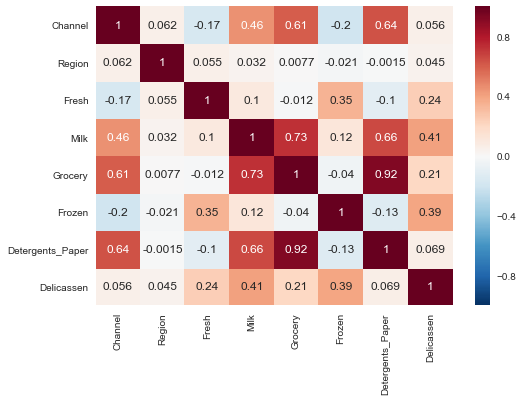

In [89]:
ax = sns.heatmap(df.corr(), annot=True)

In [102]:
# Creating data for the plotly
trace1 = go.Scatter3d(
    # Extracting data based on label
    x=df['Grocery'],
    y=df['Detergents_Paper'],
    z=df['Milk'],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Layout settings
layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Grocery'),
        yaxis = dict(
            title= 'Detergents_Paper'),
        zaxis = dict(
            title= 'Milk'),),
)

data = [trace1]

fig = dict(data=data, layout=layout)
plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

In [239]:
df = df[[col for col in df.columns if col not in ['Channel', 'Region']]]

In [240]:
df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314
5,0.065841,0.818772,0.043574,-0.305832,0.266967,0.343839
6,0.262350,-0.075655,0.261033,-0.371977,0.633927,-0.297805
7,-0.067000,0.234920,0.549293,0.050853,0.683309,1.133499
8,-0.184050,0.003712,0.168945,-0.391536,0.245413,-0.152620
9,-0.180936,1.319722,1.661286,-0.130512,1.803015,0.802054


In [241]:
df.values

array([[ 0.30168043,  1.06571214,  0.32995207, -0.46657183,  0.50678671,
         0.2638102 ],
       [-0.1048095 ,  1.09293385,  0.56599336,  0.08392603,  0.67567015,
         0.5740085 ],
       [-0.15580183,  0.91581599,  0.34441798,  0.3125889 ,  0.73651183,
         4.87145892],
       ...,
       [ 0.43654933,  2.09660171,  2.99755961, -0.38726885,  3.826342  ,
         0.63845609],
       [ 0.12936404, -0.29095409, -0.29678633, -0.17354196, -0.176932  ,
         0.82117564],
       [-0.41409532, -0.34097839, -0.26409103, -0.51955903, -0.0926267 ,
        -0.64695467]])

In [251]:
def Kmeans_nD(X, n_clusters, random_seed=442):
    
    # Randomly choose random indexes as cluster centers
    rng = np.random.RandomState(random_seed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    c_centers = X[i]
    
    # Calculate distances between each point and cluster centers
    deltas = np.array([[np.linalg.norm(i - c) for c in c_centers] for i in X])
    
    # Get labels for each point
    labels = deltas.argmin(1)

    while True:

        # Calculate mean of each cluster
        new_c_centers = np.array([X[np.where(deltas.argmin(1) == i)[0]].mean(axis=0) for i in range(n_clusters)])

        # Calculate distances again
        deltas = np.array([[np.linalg.norm(i - c) for c in new_c_centers] for i in X])
    
        # Get new labels for each point
        labels = deltas.argmin(1)

        # If there's no change in centers, exit
        if np.array_equal(c_centers, new_c_centers):
            break
        c_centers = new_c_centers

    return c_centers, labels

In [196]:
X = df.values

In [197]:
random_seed = 442
n_clusters = 3
rng = np.random.RandomState(random_seed)
i = rng.permutation(X.shape[0])[:n_clusters]
c_centers = X[i]

In [198]:
c_centers

array([[-0.42677097,  0.1258562 , -0.19082062,  0.19985775,  0.00095491,
         0.0138102 ],
       [-0.52259887, -0.05285253, -0.32148423, -0.35384068, -0.15319555,
         0.57259207],
       [ 0.65493264,  0.15767378, -0.01805298, -0.16358464,  0.39356115,
         0.82046742]])

In [199]:
deltas = np.array([[np.linalg.norm(i - c) for c in c_centers] for i in X])

In [200]:
deltas

array([[1.5645028 , 1.70253449, 1.21857164],
       [1.54731015, 1.77585216, 1.41230969],
       [5.01342643, 4.6078464 , 4.25656478],
       ...,
       [5.49212297, 5.69195445, 4.97676594],
       [1.14767406, 0.75975181, 0.93847945],
       [1.08921624, 1.27142004, 1.99209274]])

In [201]:
labels = deltas.argmin(1)

In [202]:
labels

array([2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,

In [203]:
new_c_centers = np.array([X[np.where(deltas.argmin(1) == i)[0]].mean(axis=0) for i in range(n_clusters)])

In [204]:
new_c_centers

array([[-6.64645258e-02, -1.04944536e-02,  5.66302202e-04,
         6.76400361e-01,  1.79547980e-01, -1.91518675e-01],
       [-2.93816353e-01, -1.23852873e-01, -1.64677814e-01,
        -2.22329472e-01, -9.10546607e-02,  7.02195467e-01],
       [ 7.37107255e-01,  9.60309816e-01,  9.32035476e-01,
         4.72823652e-01,  1.14405905e+00,  1.13338903e+00]])

In [252]:
centers, labels = Kmeans_nD(df[['Grocery', 'Detergents_Paper']].values, 3)

In [243]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [244]:
df['labels'] = labels

In [245]:
# Creating data for the plotly
trace1 = go.Scatter(
    # Extracting data based on label
    x=df[df['labels'] == 0]['Grocery'],
    y=df[df['labels'] == 0]['Detergents_Paper'],
    mode='markers',
    name='clust_1',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter(
    # Extracting data based on label
    x=df[df['labels'] == 1]['Grocery'],
    y=df[df['labels'] == 1]['Detergents_Paper'],
    mode='markers',
    name='clust_2',
    marker=dict(
        color='rgb(#3742fa)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

trace3 = go.Scatter(
    # Extracting data based on label
    x=df[df['labels'] == 2]['Grocery'],
    y=df[df['labels'] == 2]['Detergents_Paper'],
    mode='markers',
    name='clust_3',
    marker=dict(
        color='rgb(#ff4757)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(104, 74, 114)',
            width=1
        ),
        opacity=0.9
    )
)


data = [trace1, trace2, trace3]

# Layout settings
layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Grocery'),
        yaxis = dict(
            title= 'Detergents_Paper'),
    )
)


fig = go.Figure(data=data, layout=layout)
plot(fig)

'file:///Users/umitcakmak/Documents/PhD/Book_Proposals/temp-plot.html'

In [246]:
df.groupby('labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,-0.070577,1.316079,1.558293,0.037966,1.963503,0.665974
1,0.320582,0.026393,-0.036936,0.671540,0.068682,0.302569
2,0.635915,5.588699,5.432275,0.560929,6.780301,1.526479


In [254]:
from scipy.spatial import distance
a = (1,2,3)
b = (4,5,6)
dst = distance.euclidean(a,b)

In [255]:
dst

5.196152422706632

In [256]:
distance.euclidean?

Signature: distance.euclidean(u, v, w=None)
Docstring:
Computes the Euclidean distance between two 1-D arrays.

The Euclidean distance between 1-D arrays `u` and `v`, is defined as

.. math::

   {||u-v||}_2

   \left(\sum{(w_i |(u_i - v_i)|^2)}\right)^{1/2}

Parameters
----------
u : (N,) array_like
    Input array.
v : (N,) array_like
    Input array.
w : (N,) array_like, optional
    The weights for each value in `u` and `v`. Default is None,
    which gives each value a weight of 1.0

Returns
-------
euclidean : double
    The Euclidean distance between vectors `u` and `v`.
File:      ~/anaconda/lib/python3.6/site-packages/scipy/spatial/distance.py
Type:      function
